# <b>Customer Segmentation Using RFM Analysis</b>

<b>RFM Analysis</b> is a method mainly used in marketing, which uses three factors to segment customers in groups with similar purchasing behaviors. <br>
RFM stands for <b>Recency</b>, <b>Frequency</b> and <b>Monetary value</b>, where:
<ul>
    <li><b>Recency (R):</b> how recently a customer made a purchase or visited our website?.</li>
    <li><b>Frequency (F):</b> how many often do they make purchase?.</li>
    <li><b>Monetary value (M):</b> how much income we receive from the purchases they make?.</li>
</ul>


In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [2]:
# Visualization style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [3]:
# Importing dataset
data = pd.read_excel('datasets/Online Retail.xlsx')

In [4]:
# Data sample
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
265027,560203,22406,MONEY BOX KINGS CHOICE DESIGN,1,2011-07-15 13:13:00,1.25,15311.0,United Kingdom
329192,565841,21181,PLEASE ONE PERSON METAL SIGN,1,2011-09-07 12:04:00,4.13,NaN,United Kingdom
71458,542129,72741,GRAND CHOCOLATECANDLE,18,2011-01-25 15:18:00,1.45,13002.0,United Kingdom
45432,540260,21781,MA CAMPAGNE CUTLERY BOX,2,2011-01-06 09:40:00,14.95,13097.0,United Kingdom
435636,574076,22452,MEASURING TAPE BABUSHKA PINK,1,2011-11-02 15:38:00,1.63,NaN,United Kingdom


In [5]:
data.shape

(541909, 8)

In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Data description
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
print('='*64)
print('The data corresponds from {} to {}'.format(data.InvoiceDate.min(),
                                             data.InvoiceDate.max()))
print('='*64)

The data corresponds from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [10]:
# Drop instances where 'CustomerID' is null value
data = data.dropna(subset=['CustomerID'], axis=0)

# Transform 'CustomerID' to int type
data['CustomerID'] =  data['CustomerID'].astype('int')

# Calculate total sale 
data['Sales'] = data.UnitPrice * data.Quantity

# Extract date - no time
data['InvoiceDate'] = data['InvoiceDate'].dt.date

## RFM Features

In [11]:
# CREATING RFM FEATURES
# =============================================================================================

snapshot_date = data.InvoiceDate.max() + dt.timedelta(days=1)

# Aggregate data on a customer level
datamart = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                          'InvoiceNo': 'count',
                                          'Sales': 'sum'})

# Rename columns
datamart.rename(columns={'InvoiceDate': 'Recency',
                        'InvoiceNo': 'Frequency',
                        'Sales': 'MonetaryValue'}, inplace=True)

datamart.sample(5)

,Recency,Frequency,MonetaryValue
CustomerID,,,
14585,51,29,157.05
15471,3,77,469.48
14600,306,25,393.33
15039,10,1508,19786.44
13479,199,16,291.00


### RFM segments and scores

In [12]:
# Recency quartiles
r_quartiles = pd.qcut(datamart.Recency, 4, labels=range(4, 0, -1))
datamart = datamart.assign(R = r_quartiles.values)

# Frequency quartiles
f_quartiles = pd.qcut(datamart.Frequency, 4, labels=range(1, 5))
datamart = datamart.assign(F = f_quartiles.values)

# Monetary value quartiles
m_quartiles = pd.qcut(datamart.MonetaryValue, 4, labels=range(1, 5))
datamart = datamart.assign(M = m_quartiles.values)

# Building RFM segments
def rfm_seg(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

# Create segment label
datamart['RFM_Segment'] = datamart.apply(rfm_seg, axis=1)

# RFM Score - Sum of scores
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

datamart.sample(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
14702,2,348,3250.64,4,4,4,444,12
17720,27,50,1195.94,3,3,3,333,9
13809,306,12,155.05,1,1,1,111,3
13884,8,60,781.30,4,3,3,433,10
16367,38,130,804.49,3,4,3,343,10
17105,160,90,665.78,1,3,3,133,7
14714,25,10,160.19,3,1,1,311,5
14071,4,333,1307.41,4,4,3,443,11
13363,18,60,992.50,3,3,3,333,9


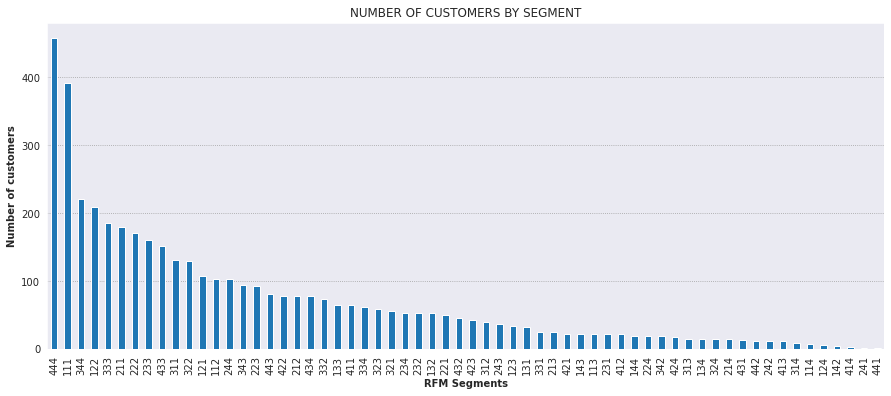

In [13]:
# Number of customers by RFM Segment
segments = datamart['RFM_Segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.title('NUMBER OF CUSTOMERS BY SEGMENT')
segments.plot(kind='bar')
plt.xlabel('RFM Segments', fontweight='bold')
plt.ylabel('Number of customers', fontweight='bold')
plt.grid(axis='x')
plt.show()

In [14]:
# Data by RFM score
datamart.groupby('RFM_Score').agg({'Recency': 'mean',
                                  'Frequency': 'mean',
                                  'MonetaryValue': 'mean'}).round(1)

,Recency,Frequency,MonetaryValue
RFM_Score,,,
3,265.6,7.8,109.1
4,175.6,13.9,227.0
5,152.7,21.1,343.8
6,95.1,28.6,491.7
7,79.5,39.5,725.4
8,63.0,57.1,972.3
9,44.7,78.8,1361.9
10,32.0,115.3,1897.6
11,21.1,199.9,3993.5


## Customers Segment Labeling

In [15]:
# Labeling segments
def segment_label(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 6) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
    
# Assigning segment labels    
datamart['SegmentLabel'] = datamart.apply(segment_label, axis=1)

datamart.sample(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,SegmentLabel
CustomerID,,,,,,,,,
18122,9,364,1826.21,4,4,4,444,12,Gold
14246,111,75,1474.06,2,3,3,233,8,Silver
12388,16,100,2780.66,4,3,4,434,11,Gold
12732,180,12,236.26,1,1,1,111,3,Bronze
14670,281,132,411.53,1,4,2,142,7,Silver
13626,253,19,257.23,1,2,1,121,4,Bronze
15863,26,18,68.84,3,2,1,321,6,Silver
15349,159,72,473.81,1,3,2,132,6,Silver
14338,159,34,554.22,1,2,2,122,5,Bronze


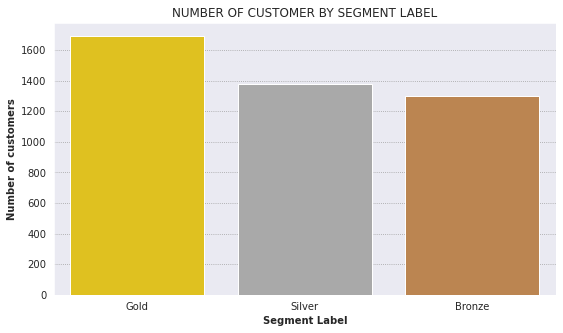

In [16]:
# Visualization of number of customers by segment label
plt.figure(figsize=(9,5))
plt.title('NUMBER OF CUSTOMER BY SEGMENT LABEL')
sns.countplot(x=datamart.SegmentLabel, order=['Gold','Silver','Bronze'], palette=['gold','darkgrey','peru'])
plt.xlabel('Segment Label', fontweight='bold')
plt.ylabel('Number of customers',fontweight='bold')
plt.show()

In [17]:
datamart.groupby('SegmentLabel').mean()

,Recency,Frequency,MonetaryValue,RFM_Score
SegmentLabel,,,,
Bronze,193.511914,14.951576,238.276765,4.099154
Gold,25.889480,194.922577,4127.427164,10.518322
Silver,79.188542,41.746193,729.848427,7.000000
